## CNN as a classifier
#### Using convolution to classify if a message is spam or not

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.layers import Input, Dense, MaxPooling1D, Convolution1D
from tensorflow.keras.models import Model

#### Loading in a dataset

In [25]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-06-14 05:33:19--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 172.67.213.166, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.05s   

2020-06-14 05:33:20 (9.45 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [26]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#### Cleaning and modifying the dataset

In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1, inplace=True)

In [ ]:
df["target value"] = df['v1'].map({"ham":1, "spam":0})

In [29]:
df

,v1,v2,target value
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0
5568,ham,Will Ì_ b going to esplanade fr home?,1
5569,ham,"Pity, * was in mood for that. So...any other s...",1
5570,ham,The guy did some bitching but I acted like i'd...,1


In [30]:
df.columns= ["target", "text", "target_index"]
df

,target,text,target_index
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0
5568,ham,Will Ì_ b going to esplanade fr home?,1
5569,ham,"Pity, * was in mood for that. So...any other s...",1
5570,ham,The guy did some bitching but I acted like i'd...,1


#### Splitting into training and testing data

In [ ]:
X = df['text'].values
Y = df['target_index'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

#### Tokenizing the text, converting the tokens into word vectors, and adding padding to shorter sentences

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train)
T = len(x_train[0])
x_test = pad_sequences(x_test, maxlen = T)

#### Building and training the model

In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D
V = len(tokenizer.index_word)
D = 30
i = Input(shape=x_train[0].shape)
x= Embedding(V+1, D)(i)
x= Conv1D(32, 3, activation = "relu")(x)
x= MaxPooling1D(3)(x)
x= Conv1D(64, 3, activation = "relu")(x)
x= MaxPooling1D(3)(x)
x= Conv1D(128, 3, activation = "relu")(x)
x= MaxPooling1D(3)(x)
x= Dense(1, activation = "sigmoid")(x)
model = Model(i, x)

In [ ]:
model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])

In [37]:
r = model.fit(x_train, y_train, epochs = 5,  validation_data = (x_test, y_test))

Epoch 1/5
117/117 [==============================] - 3s 22ms/step - loss: 0.4263 - accuracy: 0.8600 - val_loss: 0.3809 - val_accuracy: 0.8673
Epoch 2/5
117/117 [==============================] - 2s 20ms/step - loss: 0.3565 - accuracy: 0.8764 - val_loss: 0.3370 - val_accuracy: 0.8865
Epoch 3/5
117/117 [==============================] - 2s 20ms/step - loss: 0.3299 - accuracy: 0.8882 - val_loss: 0.3303 - val_accuracy: 0.8886
Epoch 4/5
117/117 [==============================] - 2s 20ms/step - loss: 0.3199 - accuracy: 0.8919 - val_loss: 0.3438 - val_accuracy: 0.8891
Epoch 5/5
117/117 [==============================] - 2s 20ms/step - loss: 0.3202 - accuracy: 0.8932 - val_loss: 0.3396 - val_accuracy: 0.8890


#### Evaluating the model

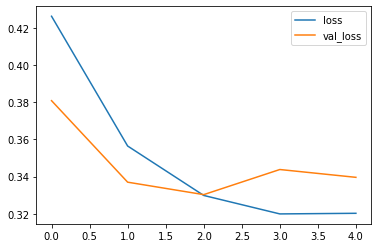

In [38]:
plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

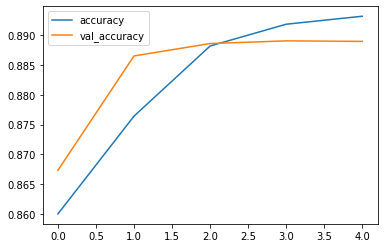

In [39]:
plt.plot(r.history['accuracy'], label = "accuracy")
plt.plot(r.history['val_accuracy'], label = "val_accuracy")
plt.legend()

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, model.predict(x_test)[:,-1,0].round()))
print(classification_report(y_test, model.predict(x_test)[:,-1,0].round()))

[[ 222   22]
 [  13 1582]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       244
           1       0.99      0.99      0.99      1595

    accuracy                           0.98      1839
   macro avg       0.97      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839

